## Suppl. Fig. 7 panel C Upset plot

In [8]:
import os, sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import upsetplot
from upsetplot import UpSet
from upsetplot import generate_counts, from_contents


sys.path.append('../../../../script/')
from external import clustering_workflows
data_path = Path.cwd().parent.parent.parent.parent / "data"

plt.rcParams['pdf.fonttype'] = 42

### load datasets

In [9]:
df = pd.read_excel(data_path / "external" / "Table_S6_annotations_literature.xlsx", sheet_name="aggregate_annotation_literature")

In [10]:
to_use = ['gene_name_canonical', "organelle_IP_graph_localization_annotation", "Itzhak2016_noLPC" , "Schessner2023" , "Geladaki2019_LOPITDC_curated" , "Geladaki2019_HyperLOPIT_curated" , "Go2021_NMF_consolidated"]
df = df[to_use]

### process data for upset plot

In [11]:
UpSet_data = {}
dfs = {}
for c in df.columns:
    if c in ['gene_name_canonical']:
        continue
    _df = df[["gene_name_canonical", c]]
    _df = _df[~(_df[c].isna() | (_df[c] == 'unclassified') | (_df[c] == 'Large Protein Complex') | (_df[c] == 'unknown') | (_df[c] == 'missing')) ]
    UpSet_data[c] = set(_df["gene_name_canonical"].tolist())
    dfs[c] = _df
    # print(_df[c].value_counts()) # uncomment to see the value counts for each dataset

### upset plot

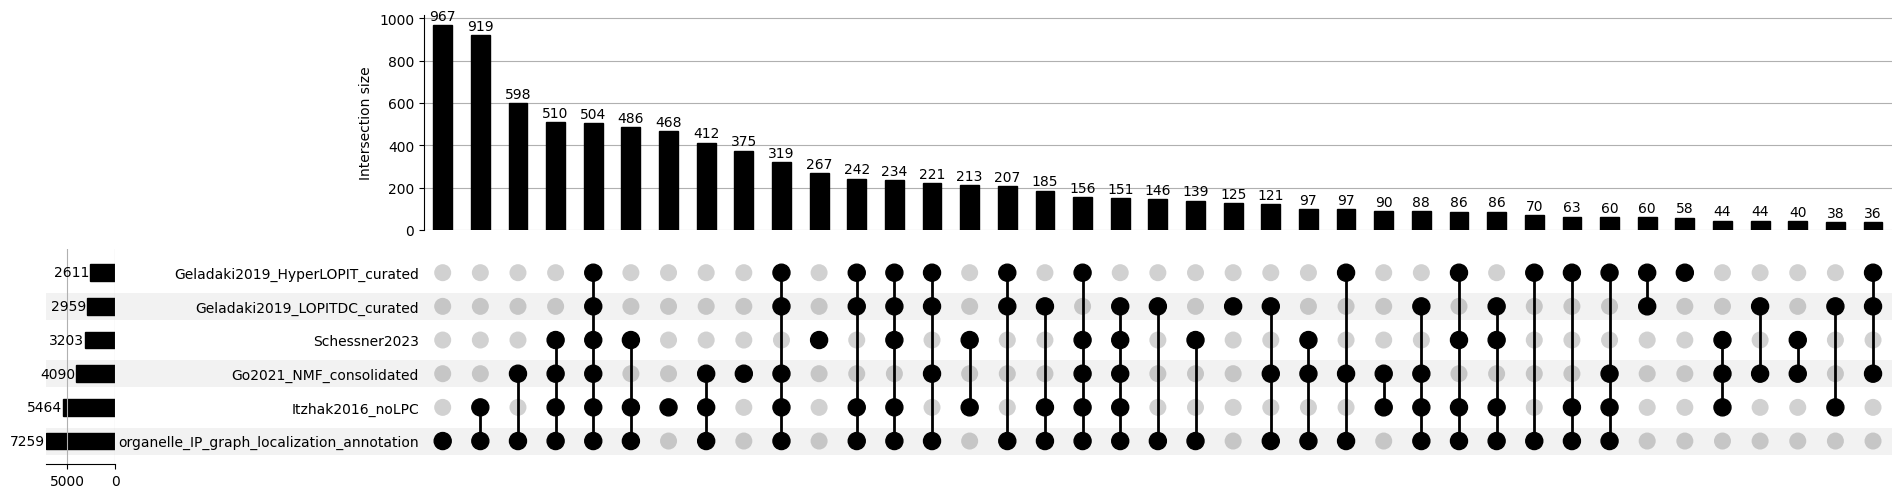

In [12]:
UpSet_data = from_contents(UpSet_data)
UpSet(UpSet_data, show_counts="{:d}", sort_by='cardinality',sort_categories_by = "cardinality", element_size=35, min_subset_size  = 30).plot()
plt.savefig("upset_plot.pdf", dpi=600, format="pdf")
plt.show()